**Data Transforms**

    1. A) Obtain the MNIST and Galaxy datasets

Let's load the data!

In [1]:
import numpy as np
galaxy = np.load('galaxy.npz')
images = galaxy['X']
labels = galaxy['y']

    1. B) Explore the dataset by plotting some sample images, as we will use this also for future exercises

"images" contain a list of images, and "labels" contain the corresponding labels. Let's try to plot the first 25 images.

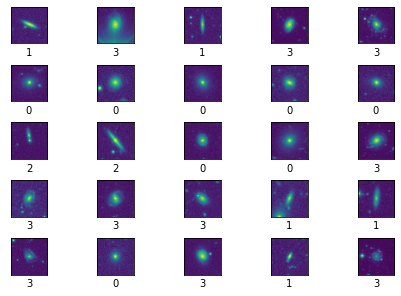

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
n = 5
fig, ax = plt.subplots(n, n, constrained_layout=True)
image_number = 0
for i in range(n):
    for j in range(n):
        image_number += 1
        ax[i][j].imshow(images[image_number].reshape(64,64))
        # hide y-axis 
        ax[i][j].get_yaxis().set_visible(False)
        # remove x-axis ticks
        ax[i][j].xaxis.set_major_locator(ticker.NullLocator())
        # write image label as x axis label
        ax[i][j].set_xlabel(labels[image_number])


    2. A) Asses the covariance / correlation structure of the dataset ( Since large matricies are hard to print out, you can try graphical representations, such as color maps)
    
Let's plot the covariance between pixels, but where the mean of each pixel value has been substracted.

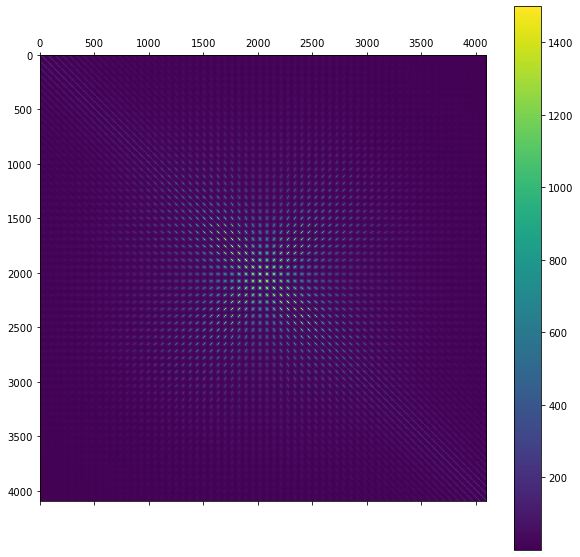

In [11]:
import seaborn as sn
import numpy as np
images_demeaned = (images - images.mean(axis = 0)) 
covMatrix = np.cov(images_demeaned.T)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(covMatrix)
fig.colorbar(cax)

    2. B) Use one of the techniques discussed in the lecture (Eigen, Cholesky or SVD)
    
Lets start with the eigenvalue technique by using the code snippet from Philipps slides.

In [12]:
from scipy.linalg import eig
eigen_entries, e = eig(covMatrix)
eig_images = images @ e.T

Let's see how this transformation changed image number 0. 

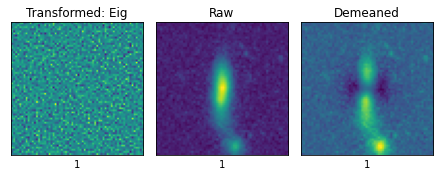

In [16]:
image_number = 0
fig, ax = plt.subplots(1, 3, constrained_layout=True)
ax[0].imshow(eig_images[image_number].reshape(64,64))
ax[1].imshow(images[image_number].reshape(64,64))
ax[2].imshow(images_demeaned[image_number].reshape(64,64))
ax[0].set_title('Transformed: Eig')
ax[1].set_title('Raw')
ax[2].set_title('Demeaned')
for axis in ax:
    axis.set_xlabel(labels[image_number])
    # hide y-axis 
    axis.get_yaxis().set_visible(False)
    # remove x-axis ticks
    axis.xaxis.set_major_locator(ticker.NullLocator())
    


Let's plot the covariance matrix for the transformed pixel values. If we have done it right, the results should look quite diagonal.

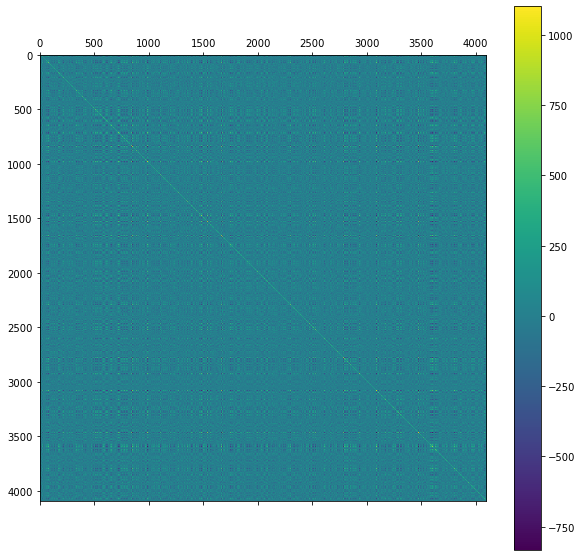

In [14]:
covMatrix_eig = np.cov(eig_images.T,bias=True)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(covMatrix_eig)
fig.colorbar(cax)

OK. Looks good. Now let's try Cholesky Whitening. Again, from the slides we have

In [22]:
inv_covMatrix = np.linalg.inv(covMatrix)
l = np.linalg.cholesky(inv_covMatrix)
images_cholesky = (l.T @ images_demeaned.T).T

So it works this time! Let's try to visualize the images.

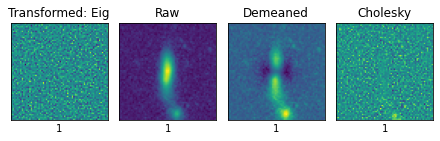

In [23]:
image_number = 0
fig, ax = plt.subplots(1, 4, constrained_layout=True)
ax[0].imshow(eig_images[image_number].reshape(64,64))
ax[1].imshow(images[image_number].reshape(64,64))
ax[2].imshow(images_demeaned[image_number].reshape(64,64))
ax[3].imshow(images_cholesky[image_number].reshape(64,64))
ax[0].set_title('Transformed: Eig')
ax[1].set_title('Raw')
ax[2].set_title('Demeaned')
ax[3].set_title('Cholesky')
for axis in ax:
    axis.set_xlabel(labels[image_number])
    # hide y-axis 
    axis.get_yaxis().set_visible(False)
    # remove x-axis ticks
    axis.xaxis.set_major_locator(ticker.NullLocator())

Let's see if the covariance matrix is diagonal also:

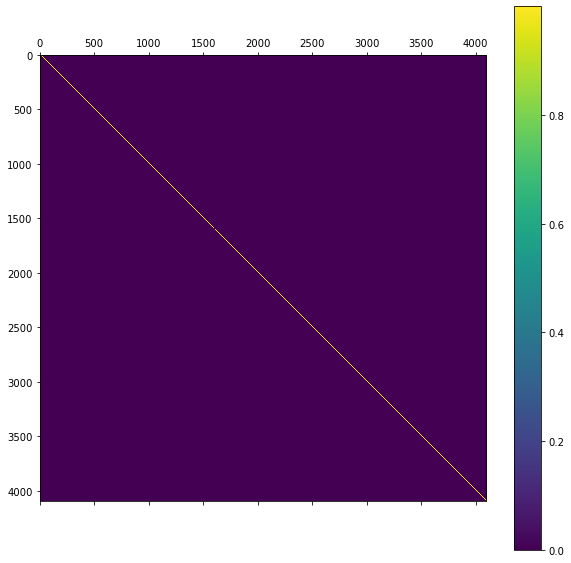

In [25]:
covMatrix_cholesky = np.cov(images_cholesky.T,bias=True)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(covMatrix_cholesky)
fig.colorbar(cax)

Looks nice!

Alright. Let's try Single Value Decoposition - here is a nice visual tutorial on SVD: https://towardsdatascience.com/essential-math-for-data-science-visual-introduction-to-singular-value-decomposition-svd-ca549ab7eb9c

In [59]:
U, S, V = np.linalg.svd(images_demeaned)

In [61]:
images_projected = np.matmul(images_demeaned, V.T)

In [62]:
images_scaled = np.multiply(images_projected, (1 / S))

In [63]:
images_unrotated = np.matmul(images_scaled, V)

In [123]:
images_svd = V@images_demeaned

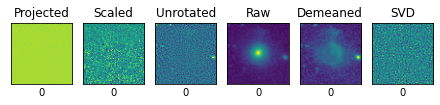

In [121]:
image_number = 100
fig, ax = plt.subplots(1, 6, constrained_layout=True)
ax[0].imshow(images_projected[image_number].reshape(64,64))
ax[0].set_title('Projected')
ax[1].imshow(images_scaled[image_number].reshape(64,64))
ax[1].set_title('Scaled')
ax[2].imshow(images_unrotated[image_number].reshape(64,64))
ax[2].set_title('Unrotated')
ax[3].imshow(images[image_number].reshape(64,64))
ax[3].set_title('Raw')
ax[4].imshow(images_demeaned[image_number].reshape(64,64))
ax[4].set_title('Demeaned')
ax[5].imshow(images_svd.T[image_number].reshape(64,64))
ax[5].set_title('SVD')
for axis in ax:
    axis.set_xlabel(labels[image_number])
    # hide y-axis 
    axis.get_yaxis().set_visible(False)
    # remove x-axis ticks
    axis.xaxis.set_major_locator(ticker.NullLocator())

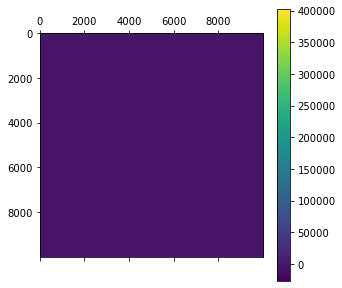

In [142]:
covMatrix_svd  = np.cov(images_svd)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
cax = ax.matshow(covMatrix_svd)
fig.colorbar(cax)

Alright. Let's try to zoom in and see whats going on.

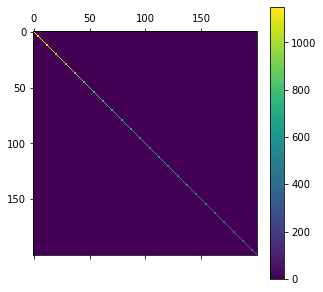

In [144]:
covMatrix_svd  = np.cov(images_svd)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
cax = ax.matshow(covMatrix_svd[200:400, 200:400])
fig.colorbar(cax)

Looks diagonal!